In [ ]:
import dateutil.parser
import pandas as pd
from dateutil.relativedelta import relativedelta

In [ ]:
# Read csvs
#Need to modify standard commodities to fit 247 BTC model
GLD = pd.read_csv("GLD_With_Weekends.csv")
SPY = pd.read_csv("SPY_With_Weekends.csv")
TSLA = pd.read_csv("TSLA_With_Weekends.csv")
Sent = pd.read_csv("sentiment_dataset.csv")
BTC = pd.read_csv("BTC.csv")
GAD = pd.read_csv("GAD.csv")
GAM = pd.read_csv("GAM.csv")
tt = pd.read_csv("n-transactions-total.csv")
hr = pd.read_csv("hash-rate.csv")
mc = pd.read_csv("market-cap.csv")
bs = pd.read_csv("blocks-size.csv")

print("Gold: " + str(GLD["Date W/ Weekend"][0]) + " " + str(GLD["Date W/ Weekend"][len(GLD) - 1]))
print("SPY: " + str(SPY["Date W/ Weekends"][0]) + " " + str(SPY["Date W/ Weekends"][len(SPY) - 1]))
print("TSLA: " + str(TSLA["Date W/ Weekends"][0]) + " " + str(TSLA["Date W/ Weekends"][len(TSLA) - 1]))
print("Sentiment: " + str(Sent["date"][0]) + " "  + str(Sent["date"][len(Sent) - 1]))
print("GAD: " +str(GAD["Day"][0]) + " " + str(GAD["Day"][len(GAD) - 1]))
print("GAM: " + str(GAM["Month"][0]) + " " + str(GAM["Month"][len(GAM) - 1]))
print("BTC: " + str(BTC["Date"][0]) + " " + str(BTC["Date"][len(BTC) - 1]))

Gold: 1/2/2008 4/9/2021
SPY: 1/2/2008 4/9/2021
TSLA: 6/30/2010 4/9/2021
Sentiment: 2021-04-15 2013-09-30
GAD: 4/14/2021 4/16/2013
GAM: 2013-05 2021-04
BTC: 2013-10-01 2021-04-15


In [ ]:
!pip install --upgrade ta


  Created wheel for ta: filename=ta-0.7.0-py3-none-any.whl size=28718 sha256=0ad7825f4aae5bda581b8ed7bd2939577d174d548ad7f53fc10f82a87cc713f0
  Stored in directory: /root/.cache/pip/wheels/5e/74/e0/72395003bd1d3c8f3f5860c2d180ff15699e47a2733d8ebd38
Successfully built ta
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Merge DataFrames

start_date = dateutil.parser.isoparse("2013-10-01")
end_date = dateutil.parser.isoparse("2021-04-08")
GLD_format = "%-m/%-d/%Y"
Sentiment_format = "%Y-%m-%d"
GAM_format = "%Y-%m"

columns =["HR " + x for x in hr.columns.to_list()] + ["MC " + x for x in mc.columns.to_list()] + ["BS " + x for x in bs.columns.to_list()] + ["TT " + x for x in tt.columns.to_list()] + ["GLD " + x for x in GLD.columns.to_list()] + ["SPY " + x for x in SPY.columns.to_list()] + ["TSLA " + x for x in TSLA.columns.to_list()] + ["GAD " + x for x in GAD.columns.to_list()] + ["GAM " + x for x in GAM.columns.to_list()] + ["SENT " + x for x in Sent.columns.to_list()] + ["BTC " + x for x in BTC.columns.to_list()]


data_list = []
while start_date <= end_date:
    start_date = start_date + relativedelta(days=1)
    hr_day = hr.loc[hr["Date"] == start_date.strftime(GLD_format)]
    mc_day = mc.loc[mc["Date"] == start_date.strftime(GLD_format)]
    bs_day = bs.loc[bs["date"] == start_date.strftime(GLD_format)]
    tt_day = tt.loc[tt["Date"] == start_date.strftime(GLD_format)]
    gold_day = GLD.loc[GLD["Date W/ Weekend"] == start_date.strftime(GLD_format)]
    spy_day = SPY.loc[SPY["Date W/ Weekends"] == start_date.strftime(GLD_format)]
    tsla_day = TSLA.loc[TSLA["Date W/ Weekends"] == start_date.strftime(GLD_format)]
    sent_day = Sent.loc[Sent["date"] == start_date.strftime(Sentiment_format)]
    ga_day = GAD.loc[GAD["Day"] == start_date.strftime(GLD_format)]
    ga_month = GAM.loc[GAM["Month"] == start_date.strftime(GAM_format)]
    btc_day = BTC.loc[BTC["Date"] == start_date.strftime(Sentiment_format)]
    data = sum(hr_day.values.tolist(), []) + sum(mc_day.values.tolist(), [])+ sum(bs_day.values.tolist(), []) + sum(tt_day.values.tolist(), []) +sum(gold_day.values.tolist(), []) + sum(spy_day.values.tolist(),[]) + sum(tsla_day.values.tolist(),[]) + sum(ga_day.values.tolist(),[]) + sum(ga_month.values.tolist(),[]) + sum(sent_day.values.tolist(),[]) + sum(btc_day.values.tolist(),[])
    data_list.append(data)
df = pd.DataFrame(columns=columns, data=data_list)
del df["GAD Unnamed: 2"]
del df["GAD in 8 month segments"]
"""
#inserting new feature Trailing 30-day BTC Price
df["BTC Trailing 30-Day Avg"]=df["BTC Closing Price (USD)"]
for i in range(30,len(df)):
    df["BTC Trailing 30-Day Avg"][i]=df["BTC Closing Price (USD)"][i-30:i].mean()
"""
def get_data():
    rdf = df.copy(deep=True)
    return rdf  
print(df) 


        HR Date  HR hash-rate    MC Date  MC market-cap    BS date  \
0     10/2/2013  1.213246e+03  10/2/2013   1.486635e+09  10/2/2013   
1     10/3/2013  1.538751e+03  10/3/2013   1.224109e+09  10/3/2013   
2     10/4/2013  1.538751e+03  10/4/2013   1.224109e+09  10/4/2013   
3     10/5/2013  1.538751e+03  10/5/2013   1.438749e+09  10/5/2013   
4     10/6/2013  1.900663e+03  10/6/2013   1.438749e+09  10/6/2013   
...         ...           ...        ...            ...        ...   
2742   4/5/2021  1.506721e+08   4/5/2021   1.080000e+12   4/5/2021   
2743   4/6/2021  1.656242e+08   4/6/2021   1.080000e+12   4/6/2021   
2744   4/7/2021  1.656242e+08   4/7/2021   1.050000e+12   4/7/2021   
2745   4/8/2021  1.656242e+08   4/8/2021   1.050000e+12   4/8/2021   
2746   4/9/2021  1.748256e+08   4/9/2021   1.050000e+12   4/9/2021   

      BS block-size    TT Date  TT n-transactions-total GLD Date W/ Weekend  \
0       11295.90301  10/2/2013                 24732277           10/2/2013   
1

In [ ]:
# Prepare df for training
import numpy as np
from sklearn.model_selection import train_test_split
# delete unnecesary date columns
date_columns = [  "BTC Date","HR Date", "MC Date", "BS date", "TT Date", "GLD Date W/ Weekend", "SPY Date W/ Weekends", "TSLA Date W/ Weekends", "GAD Day", "GAM Month", "SENT date"]
data_proc = get_data()
data_proc = data_proc.drop(date_columns, axis = 1)


data_proc = data_proc.drop(["GAM  Bitcoin"], axis = 1)
data_proc = data_proc.drop(["BTC Currency"], axis=1)
unnecessary_columns = ["BTC 24h Open (USD)", "GLD Open", "GLD High", "GLD Low", "GLD Adj Close", "SPY Open", "SPY High", "SPY Low", "SPY Adj Close", "TSLA Open", "TSLA High", "TSLA Low", "TSLA Adj Close"]
data_proc = data_proc.drop(unnecessary_columns, axis = 1)

# Getting X and Y Values (I let the Y Value be the next day's 24H Close)


# Add pct change values
data_proc["GLD Change"] = data_proc["GLD Close"].pct_change()
data_proc["TSLA Change"] = data_proc["TSLA Close"].pct_change()
data_proc["SPY Change"] = data_proc["SPY Close"].pct_change()
# Add gap features
data_proc["BTC diff"] = data_proc["BTC 24h High (USD)"] - data_proc["BTC 24h Low (USD)"]
for x in range(3):
    data_proc["BTC Change " + str(x + 1) + " Day"] = data_proc["BTC Closing Price (USD)"].pct_change(periods = x + 1)
data_proc = data_proc.drop(data_proc.head(3).index)
Y = data_proc["BTC Closing Price (USD)"]
# Make Y the classification target
Y = Y.pct_change()
Y = Y.apply(lambda x: 0 if x <= 0 else 1)
Y = Y.drop(Y.head(1).index) # drop first 2018-01-01
data_proc = data_proc.drop(data_proc.tail(1).index) # drop last row 2021-04-09



# Now the Ys are each one day ahead of the Xs at the same index
data_proc["Y"] = Y.values

# convert large range Xs to log of themselves
data_proc["HR hash-rate"] = np.log(data_proc["HR hash-rate"])
data_proc["MC market-cap"] = np.log(data_proc["MC market-cap"])
data_proc["BS block-size"] = np.log(data_proc["BS block-size"])
data_proc["TT n-transactions-total"] = np.log(data_proc["TT n-transactions-total"])
data_proc["GLD Volume"] = np.log(data_proc["GLD Volume"])
data_proc["SPY Volume"] = np.log(data_proc["SPY Volume"])
data_proc["TSLA Volume"] = np.log(data_proc["TSLA Volume"])
data_proc["BTC Closing Price (USD)"] = np.log(data_proc["BTC Closing Price (USD)"])
data_proc["BTC 24h High (USD)"] = np.log(data_proc["BTC 24h High (USD)"])
data_proc["BTC 24h Low (USD)"] = np.log(data_proc["BTC 24h Low (USD)"])




'''
for col in data_proc.columns.values:
    for x in range(3):
        data_proc[col + " " + str(x + 1)] = data_proc[col].shift(periods=x + 1)

# drop first 6 rows
data_proc = data_proc.drop(data_proc.head(7).index) # drop first week of rows
'''
'''
for col in data_proc.columns.values:
    data_proc[col + " delta"] = data_proc[col].pct_change()
'''
X = data_proc.drop("Y", axis = 1)
Y = data_proc["Y"]

data_proc = data_proc.sample(frac = 1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Make data available
def get_all_data():
    return data_proc.copy()
def get_training_data():
    return X_train.copy(), y_train.copy()

# Only for final validation, do not contaminate
def get_test_data():
    return X_test.copy(), y_test.copy()

get_training_data()[0]


,HR hash-rate,MC market-cap,BS block-size,TT n-transactions-total,GLD Close,GLD Volume,SPY Close,SPY Volume,TSLA Close,TSLA Volume,...,BTC Closing Price (USD),BTC 24h High (USD),BTC 24h Low (USD),GLD Change,TSLA Change,SPY Change,BTC diff,BTC Change 1 Day,BTC Change 2 Day,BTC Change 3 Day
2276,18.226984,25.613615,12.450741,20.004817,142.380005,15.936873,322.940002,17.246629,86.188004,17.788995,...,8.879571,8.912941,8.868656,0.007857,0.013380,0.005323,321.748417,-0.004035,-0.007176,0.002447
1438,15.863441,25.066991,11.796037,19.348001,127.970001,16.014955,246.580002,17.971778,68.680000,16.607749,...,8.361936,8.455048,8.331259,0.000000,0.000000,0.000000,547.088750,-0.075104,-0.057698,-0.052372
2232,18.262418,25.792170,12.424145,19.976241,137.429993,15.679374,309.000000,17.654632,69.986000,17.420927,...,9.078053,9.088894,9.055432,0.002700,0.014025,0.002108,291.443623,0.005666,-0.035270,-0.004222
1612,16.964893,25.938202,11.981988,19.526186,125.389999,16.117525,269.079987,18.750583,67.024002,17.052776,...,9.314727,9.320598,9.242717,0.005372,0.012661,0.005155,836.597500,0.072280,0.018093,0.080541
1863,17.630067,25.450654,12.158129,19.687397,115.779999,15.848751,280.500000,17.998856,70.279999,17.383733,...,8.766008,8.784275,8.764200,-0.002155,0.009306,-0.001815,129.797115,-0.015652,-0.002084,0.002528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,17.079850,25.468198,12.005154,19.544382,125.790001,15.775887,263.149994,18.530446,53.226002,18.144314,...,8.849423,8.890970,8.793875,0.000000,0.000000,0.000000,672.328750,0.015892,-0.113902,-0.113552
1098,14.340711,22.996308,11.359434,18.893333,120.970001,17.008974,214.679993,18.602570,42.282001,16.689499,...,6.412631,6.417735,6.411215,-0.034711,-0.010716,-0.005098,3.981250,-0.003912,-0.006103,-0.001783
1133,14.429591,23.143991,11.409488,18.946592,121.639999,16.064758,214.110001,18.486207,38.987999,16.609004,...,6.559805,6.561863,6.551123,-0.004175,0.008954,0.004504,7.558750,0.000939,0.000928,0.005638
1297,15.279588,23.713848,11.631258,19.184637,122.309998,16.563294,234.589996,18.519528,61.119999,16.931201,...,7.140217,7.142563,7.112881,0.002870,0.010215,-0.003187,36.986000,0.027461,0.035314,0.041233


In [ ]:
data = get_all_data()
# Correlation list
corr = data.corr()

correlations_s = corr['Y']
print('Correlations to Y: \n' + correlations_s.abs().sort_values()[::
-1].to_string() +'\n\n\n')

Correlations to Y: 
Y                          1.000000
BTC Change 1 Day           0.063181
SENT compound              0.049958
SENT neg                   0.045703
SENT neu                   0.039857
TT n-transactions-total    0.034435
BS block-size              0.034334
BTC Change 2 Day           0.028237
TSLA Close                 0.025652
SPY Volume                 0.025203
TSLA Change                0.025035
SPY Change                 0.024422
SPY Close                  0.021422
GLD Volume                 0.016499
HR hash-rate               0.014982
MC market-cap              0.014586
SENT pos                   0.013495
TSLA Volume                0.013298
BTC 24h High (USD)         0.011329
GLD Close                  0.011241
BTC 24h Low (USD)          0.010593
BTC Closing Price (USD)    0.010255
BTC Change 3 Day           0.008889
GAD bitcoin                0.008124
BTC diff                   0.007241
GLD Change                 0.005024





<AxesSubplot:>

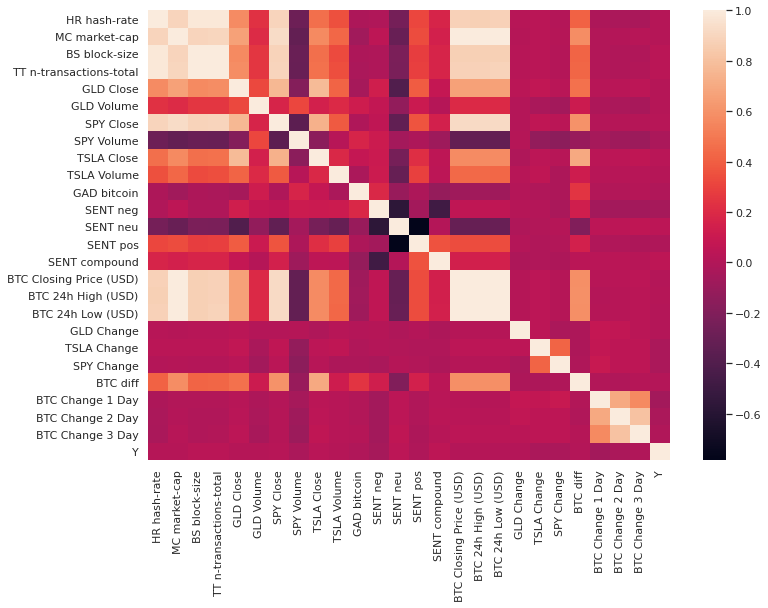

In [ ]:
# Correlation heatmap
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
"""
# Randomize, Scale Data and try some models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std




data = data.sample(frac=1, random_state=42)

scaler = StandardScaler()
y = data["Y"]
X = data.drop("Y", axis = 1)
scaled_X = scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = linear_model.LinearRegression()


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('Linear Reg Mean Absolute Error: %.3f (%.3f)' % (mean(scores), std(scores)))

regr_svm = svm.SVR()

scores = cross_val_score(regr_svm, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('SVM Mean Absolute Error: %.3f (%.3f)' % (mean(scores), std(scores)))

regr = tree.DecisionTreeRegressor()

scores = cross_val_score(regr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('Decision Tree Regressor Mean Absolute Error: %.3f (%.3f)' % (mean(scores), std(scores)))

regr = RandomForestRegressor()

scores = cross_val_score(regr, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('Random Forest Regressor Mean Absolute Error: %.3f (%.3f)' % (mean(scores), std(scores)))


"""

'\n# Randomize, Scale Data and try some models\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import linear_model\nfrom sklearn.model_selection import RepeatedKFold\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn import tree\nfrom sklearn import svm\nfrom sklearn.ensemble import RandomForestRegressor\nfrom numpy import mean\nfrom numpy import std\n\n\n\n\ndata = data.sample(frac=1, random_state=42)\n\nscaler = StandardScaler()\ny = data["Y"]\nX = data.drop("Y", axis = 1)\nscaled_X = scaler.fit(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nreg = linear_model.LinearRegression()\n\n\ncv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)\n\nscores = cross_val_score(reg, X_train, y_train, scoring=\'neg_mean_absolute_error\', cv=cv, n_jobs=-1)\n\nprint(\'Linear Reg Mean Absolute Error: %.3f (%.3f)\' % (mean(scores), std(scores)))\n\nregr_svm =

In [ ]:
# Run simple models
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier

xtrain, ytrain = get_training_data()
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
print(ytrain.value_counts(normalize=True) * 100)

def test_model(mod, name):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
    scores = cross_val_score(mod, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    print(name + ' accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


test_model(LogisticRegression(), "Logistic Regression")
test_model(KNeighborsClassifier(), "K Neighbors")
test_model(DecisionTreeClassifier(), "Decision Tree")
test_model(RidgeClassifier(), "Ridge Classifier")
test_model(PassiveAggressiveClassifier(), "PA")
# test_model(GaussianProcessClassifier(), "GP")
test_model(GradientBoostingClassifier(), "Gradient Boosting")
test_model(RandomForestClassifier(), "Random Forest")
test_model(AdaBoostClassifier(), "AdaBoost")
test_model(MLPClassifier(), "MLP")

test_model(VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('rr', RidgeClassifier(alpha = 2.5)), ('ab', AdaBoostClassifier())]), "voting")

1    54.557885
0    45.442115
Name: Y, dtype: float64
Logistic Regression accuracy: 0.540 (0.021)
K Neighbors accuracy: 0.506 (0.033)
Decision Tree accuracy: 0.512 (0.033)
Ridge Classifier accuracy: 0.563 (0.027)
PA accuracy: 0.512 (0.038)
Gradient Boosting accuracy: 0.550 (0.032)
Random Forest accuracy: 0.531 (0.031)
AdaBoost accuracy: 0.542 (0.031)
MLP accuracy: 0.511 (0.036)
voting accuracy: 0.558 (0.031)


In [ ]:
# Parameter tuning
from sklearn.model_selection import RandomizedSearchCV
"""
options = dict(alpha=[0.1, 0.5, 1.0, 1.5, 2.5, 5, 10])
r = RandomizedSearchCV(RidgeClassifier(), options, random_state=42)
r.fit(xtrain, ytrain)
print(r.best_params_)
test_model(RidgeClassifier(alpha=2.5), "ro")

options = dict(n_estimators=[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], max_features = ['auto', 'sqrt'], max_depth = [int(x) for x in np.linspace(10, 110, num = 11)], min_samples_split = [2, 5, 10], min_samples_leaf = [1, 2, 4], bootstrap = [True, False])
r = RandomizedSearchCV(RandomForestClassifier(), options, random_state=42, verbose=3)
r.fit(xtrain, ytrain)
print(r.best_params_)
"""
test_model(RandomForestClassifier(n_estimators= 200, min_samples_split= 10, min_samples_leaf= 2, max_features= 'auto', max_depth= 70, bootstrap= True), "rf")

rf accuracy: 0.540 (0.030)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier

xtrain, ytrain = get_training_data()

def build():
    model = Sequential()
    model.add(Dense(3, input_dim=25, activation='relu'))
    model.add(Dense(16, input_dim=25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model;

estimator = []
estimator.append(("standardize", StandardScaler()))
estimator.append(("nn", KerasClassifier(build_fn=build, epochs=40, batch_size=32, verbose=1)))
pipe = Pipeline(estimator)
kfold = StratifiedKFold()
results = cross_val_score(pipe, xtrain, ytrain, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

#test_model(VotingClassifier(estimators=[('mlp', MLPClassifier()), ('rf', RandomForestClassifier()), ('rr', RidgeClassifier(alpha = 2.5)), ('ab', AdaBoostClassifier())], voting="hard"), "soft")



Epoch 1/40
55/55 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.4782
Epoch 2/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5264
Epoch 3/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5398
Epoch 4/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5271
Epoch 5/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5449
Epoch 6/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5468
Epoch 7/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5343
Epoch 8/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5572
Epoch 9/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5320
Epoch 10/40
55/55 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5444
Epoch 11/40
55/55 [

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a209e17-199c-4870-98fa-a9ef0ffeed4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>